In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gdfx = gpd.read_file(r'C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_FIN.shp', encoding='latin-1')
gdfx.head()

,osmid,amenity,name,building,addr_house,addr_stree,addr_hou_1,addr_postc,building_l,start_date,...,height,roof_colou,roof_mater,roof_shape,residentia,roof_level,addr_neigh,build_prog,build_ager,geometry
0,30527021,NaN,Sim Lim Square,retail,1,Rochor Canal Road,NaN,188504,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deco_box,NaN,"POLYGON ((103.85308 1.30254, 103.85302 1.30259..."
1,32342169,NaN,National Museum of Singapore,public,93,Stamford Road,NaN,178897,NaN,1887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,civic,1875-1899,"POLYGON ((103.84797 1.29710, 103.84808 1.29718..."
2,32507125,police,Police Cantonment Complex,yes,391,New Bridge Road,NaN,088762,NaN,2001.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-2024,"POLYGON ((103.83885 1.27855, 103.83912 1.27869..."
3,32507157,NaN,NaN,office,11,Outram Road,NaN,169078,NaN,1981.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,glass_box,1975-1999,"POLYGON ((103.83794 1.28024, 103.83794 1.28044..."
4,32507166,NaN,NaN,public,3,Second Hospital Avenue,Health Promotion Board Building,168937,NaN,1981.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,civic,1975-1999,"POLYGON ((103.83840 1.27965, 103.83823 1.27965..."


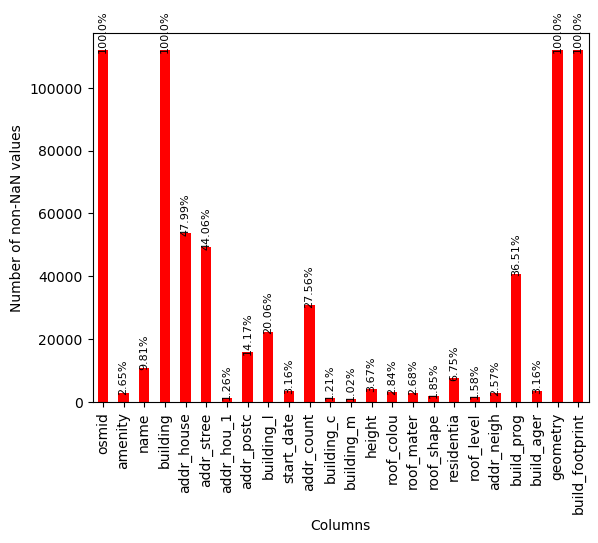

In [87]:
# get the count of non-NaN values for each column
non_nan_count = gdfx.count()

# create a bar plot of non-NaN counts with red color
ax = non_nan_count.plot(kind='bar', color='red')

# add the count percentage above each bar
for i, v in enumerate(non_nan_count):
    ax.text(i, v+5, str(round((v/gdfx.shape[0])*100, 2)) + '%', ha='center', rotation=90, size=8)
    
# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [89]:
gdfx['addr_count'].unique()

array(['SG', nan], dtype=object)

In [7]:
gdfx['residentia'].value_counts().get('hdb', 0)

733

In [24]:
#replace building programs in column build_prog
word1 = 'residential'
word2 = 'resident_high'
# mask = gdfx['name'].str.contains('Cafe', case=False)
mask = gdfx['residentia'].notna()
# gdfx[mask]
gdfx.loc[mask & ((gdfx['building'] == 'yes') | (gdfx['building'] == 'no')), 'building'] = word1
gdfx.loc[mask & ((gdfx['build_prog'].isna())), 'build_prog'] = word2

gdfx['build_prog'].value_counts().get(word2, 0)

17670

In [31]:
gdfx['amenity'].unique()

array([nan, 'police', 'food_court', 'hospital', 'library',
       'place_of_worship', 'bank', 'social_facility', 'conference_centre',
       'college', 'restaurant', 'parking', 'shelter', 'clinic', 'fuel',
       'theatre', 'toilets', 'fast_food', 'cafe', 'nursing_home',
       'childcare', 'music_school', 'bar', 'public_building',
       'vehicle_inspection', 'fire_station', 'kindergarten',
       'arts_centre', 'marketplace', 'pub', 'ferry_terminal',
       'community_centre', 'dressing_room', 'car_wash', 'doctors',
       'cinema', 'monastery', 'bus_station', 'school', 'studio',
       'prep_school', 'car_rental', 'ice_cream', 'language_school',
       'events_venue', 'shower', 'clubhouse', 'waste_transfer_station',
       'stage', 'waste_disposal', 'pharmacy', 'atm', 'driving_school',
       'commercial', 'crematorium', 'post_office', 'veterinary',
       'dentist', 'social_centre', 'university', 'taxi', 'Clubhouse',
       'townhall', 'bicycle_rental', 'bicycle_parking'], dtype=ob

In [86]:
#check amount of waste facilites in amenities column
w1=gdfx['amenity'].value_counts().get(amelist[49],0)
w2=gdfx['amenity'].value_counts().get(amelist[47],0)
print(f"{amelist[49]} = {w2}, {amelist[47]} = {w1}") 

waste_disposal = 23, waste_transfer_station = 35


In [43]:
gdfx['build_prog'].unique()

array(['deco_box', 'civic', 'glass_box', nan, 'industrial', 'medic',
       'resident_high', 'resident_low', 'transport', 'religious',
       'education', 'small_box', 'sport', 'ruins', 'construction_site'],
      dtype=object)

In [78]:
amelist[49]

'waste_disposal'

In [76]:
#replace building programs in column build_prog
amelist = gdfx['amenity'].unique()
program_list = gdfx['build_prog'].unique()
word = program_list[10]
mask = gdfx['amenity'].str.contains(amelist[59], case=False)
mask = mask.fillna(False)

gdfx.loc[mask & ((gdfx['building'] == 'yes') | (gdfx['building'] == 'no')), 'building'] = word
gdfx.loc[mask & ((gdfx['build_prog'].isna())), 'build_prog'] = word

gdfx['build_prog'].value_counts().get(word, 0)

438

In [56]:
gdfx[mask]

,osmid,amenity,name,building,addr_house,addr_stree,addr_hou_1,addr_postc,building_l,start_date,...,roof_colou,roof_mater,roof_shape,residentia,roof_level,addr_neigh,build_prog,build_ager,geometry,build_footprint
612,104960240,nursing_home,Orange Valley Nursing Home,medic,221,Clementi Avenue 4,NaN,129881,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,medic,NaN,"POLYGON ((103.769 1.319, 103.769 1.319, 103.76...",6.935187e-08
15610,372138391,nursing_home,Saint Bernadette Lifestyle Village,residential,255B,Bukit Timah Road,NaN,259693,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,resident_high,NaN,"POLYGON ((103.837 1.315, 103.837 1.315, 103.83...",2.104512e-08
75384,464928945,nursing_home,NTUC Health Nursing Home,medic,50,Jurong West Street 93,NaN,648967,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,resident_high,NaN,"POLYGON ((103.692 1.341, 103.692 1.341, 103.69...",1.328948e-07
93917,293480960,nursing_home,Orange Valley Nursing Home,medic,52,Biggin Hill Road,NaN,509945,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,medic,NaN,"POLYGON ((103.982 1.389, 103.982 1.389, 103.98...",5.842240e-08
99833,464928937,nursing_home,NTUC Health Nursing Home,medic,35,Chai Chee Street,NaN,468984,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,resident_high,NaN,"POLYGON ((103.922 1.328, 103.922 1.328, 103.92...",1.095009e-07


In [6]:
#add column with age ranges
def generate_ranges(start_year, end_year, step):
    ranges = []
    for i in range(start_year, end_year+1, step):
        end = min(i+step-1, end_year)
        ranges.append(f"{i}-{end}")
    return ranges

gdfx['build_agerange'] = gdfx['start_date'].apply(lambda x: generate_ranges(1800, 2025, 25)[int(x-1800)//25] if not np.isnan(x) else np.NaN)

In [ ]:
gdfx = gdfx.drop(columns=[''])

In [28]:
gdfx.crs = 3414
gdfx.crs

<Derived Projected CRS: EPSG:3414>
Name: SVY21 / Singapore TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Singapore - onshore and offshore.
- bounds: (103.59, 1.13, 104.07, 1.47)
Coordinate Operation:
- name: Singapore Transverse Mercator
- method: Transverse Mercator
Datum: SVY21
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
gdfx.shape

(111889, 23)

In [27]:
# Count the number of changes made
gdfx['residentia'].isna().sum()

104332

In [29]:
gdfx['build_footprint'] = gdfx['geometry'].area

In [30]:
gdfx.head()

,osmid,amenity,name,building,addr_house,addr_stree,addr_hou_1,addr_postc,building_l,start_date,...,roof_colou,roof_mater,roof_shape,residentia,roof_level,addr_neigh,build_prog,build_ager,geometry,build_footprint
0,30527021,NaN,Sim Lim Square,retail,1,Rochor Canal Road,NaN,188504,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,deco_box,NaN,"POLYGON ((103.853 1.303, 103.853 1.303, 103.85...",4.846470e-07
1,32342169,NaN,National Museum of Singapore,public,93,Stamford Road,NaN,178897,NaN,1887.0,...,NaN,NaN,NaN,NaN,NaN,NaN,civic,1875-1899,"POLYGON ((103.848 1.297, 103.848 1.297, 103.84...",5.711683e-07
2,32507125,police,Police Cantonment Complex,yes,391,New Bridge Road,NaN,088762,NaN,2001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-2024,"POLYGON ((103.839 1.279, 103.839 1.279, 103.83...",6.811147e-07
3,32507157,NaN,NaN,office,11,Outram Road,NaN,169078,NaN,1981.0,...,NaN,NaN,NaN,NaN,NaN,NaN,glass_box,1975-1999,"POLYGON ((103.838 1.280, 103.838 1.280, 103.83...",4.196015e-07
4,32507166,NaN,NaN,public,3,Second Hospital Avenue,Health Promotion Board Building,168937,NaN,1981.0,...,NaN,NaN,NaN,NaN,NaN,NaN,civic,1975-1999,"POLYGON ((103.838 1.280, 103.838 1.280, 103.83...",4.833084e-07


In [88]:
# Save the modified shapefile
gdfx.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_FIN.shp')

C:\Users\rromu\AppData\Local\Temp\ipykernel_2740\1213618896.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdfx.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_FIN.shp')
